___

<a href='https://www.udemy.com/user/joseportilla/'></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [6]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df_month = df[df['Contract'] == 'Month-to-month']
df_one_year = df[df['Contract'] == 'One year']
df_two_year = df[df['Contract'] == 'Two year']

In [12]:
df_diff_month = df_month['TotalCharges']/df['MonthlyCharges']
df_diff_one_year = df_one_year['TotalCharges']/df['MonthlyCharges']
df_diff_two_year = df_two_year['TotalCharges']/df['MonthlyCharges']

In [13]:
df_diff_month.describe()

count    3875.000000
mean       18.024140
std        17.698773
min         1.000000
25%         3.127537
50%        11.792632
75%        28.253170
max        71.989484
dtype: float64

In [14]:
df_diff_one_year.describe()


count    1472.000000
mean       42.066282
std        19.080060
min         1.000000
25%        26.709434
50%        44.041723
75%        58.404472
max        74.231579
dtype: float64

In [15]:
df_diff_two_year.describe()

count    1685.000000
mean       57.116298
std        17.771137
min         1.000000
25%        48.910798
50%        64.124031
75%        70.552836
max        79.341772
dtype: float64

# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [16]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

In [17]:
# sns.countplot(data=df, x='Churn')
#  или 
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<Axes: xlabel='Churn', ylabel='tenure'>

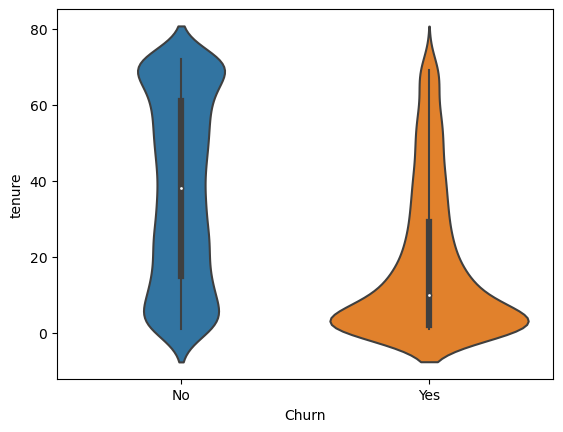

In [18]:
# sns.violinplot(data=df, x='Churn', y='TotalCharges')
# sns.violinplot(data=df, x='Churn', y='MonthlyCharges')
sns.violinplot(data=df, x='Churn', y='tenure')

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

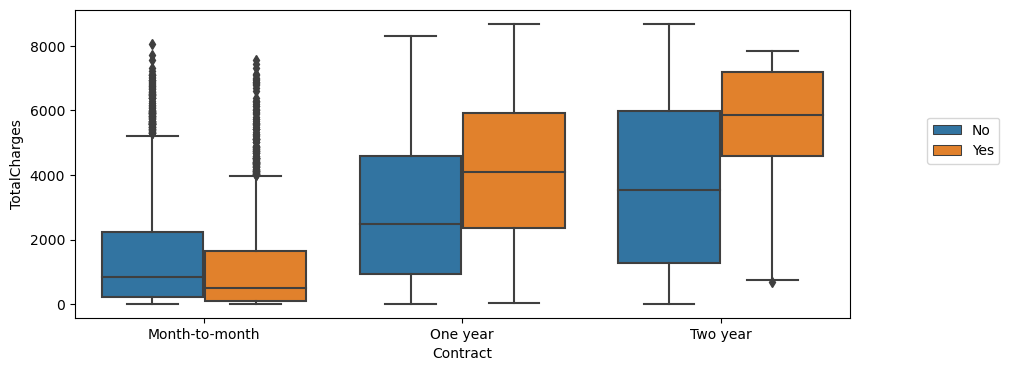

In [19]:
plt.figure(figsize=(10, 4), dpi=100)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.legend(loc=(1.1, 0.5))

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [20]:
corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]).corr()

In [21]:
corr_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.005285,0.005285,-0.381912,0.381912,-0.163386,0.163386,...,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181,0.354049,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.013779,-0.013779,-0.097825,0.097825,0.112343,-0.112343,...,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568,-0.192858,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,...,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708,0.199484,-0.199484
gender_Female,0.001819,-0.005285,0.013779,-0.000048,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545


In [22]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values(ascending=False).iloc[1:-1]

In [23]:
corr_yes_churn

Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Female                              0.008545
gender_Male 

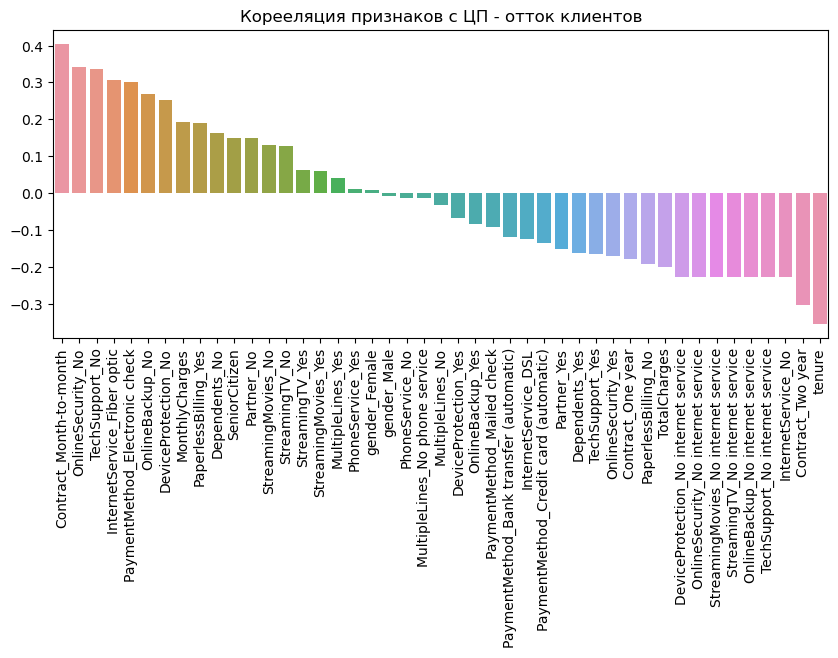

In [24]:
plt.figure(figsize=(10, 4), dpi = 100)
plt.title('Корееляция признаков с ЦП - отток клиентов')
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)
plt.xticks(rotation=90);

Какие выводы. Максимальная корреляция - месячные контракты (+), 2-х летние контракты(-).

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [25]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

In [26]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

<Axes: xlabel='tenure', ylabel='Count'>

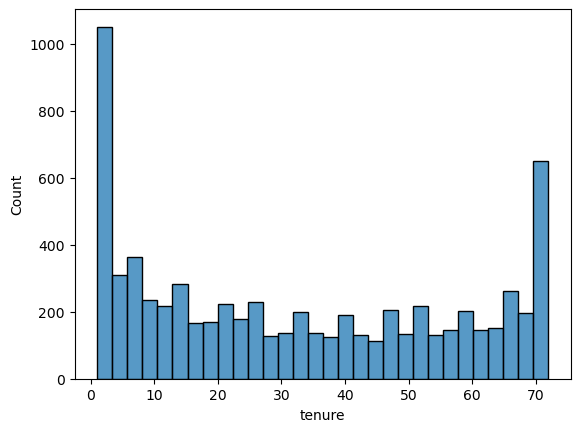

In [27]:
sns.histplot(data=df, x='tenure', bins=30)

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

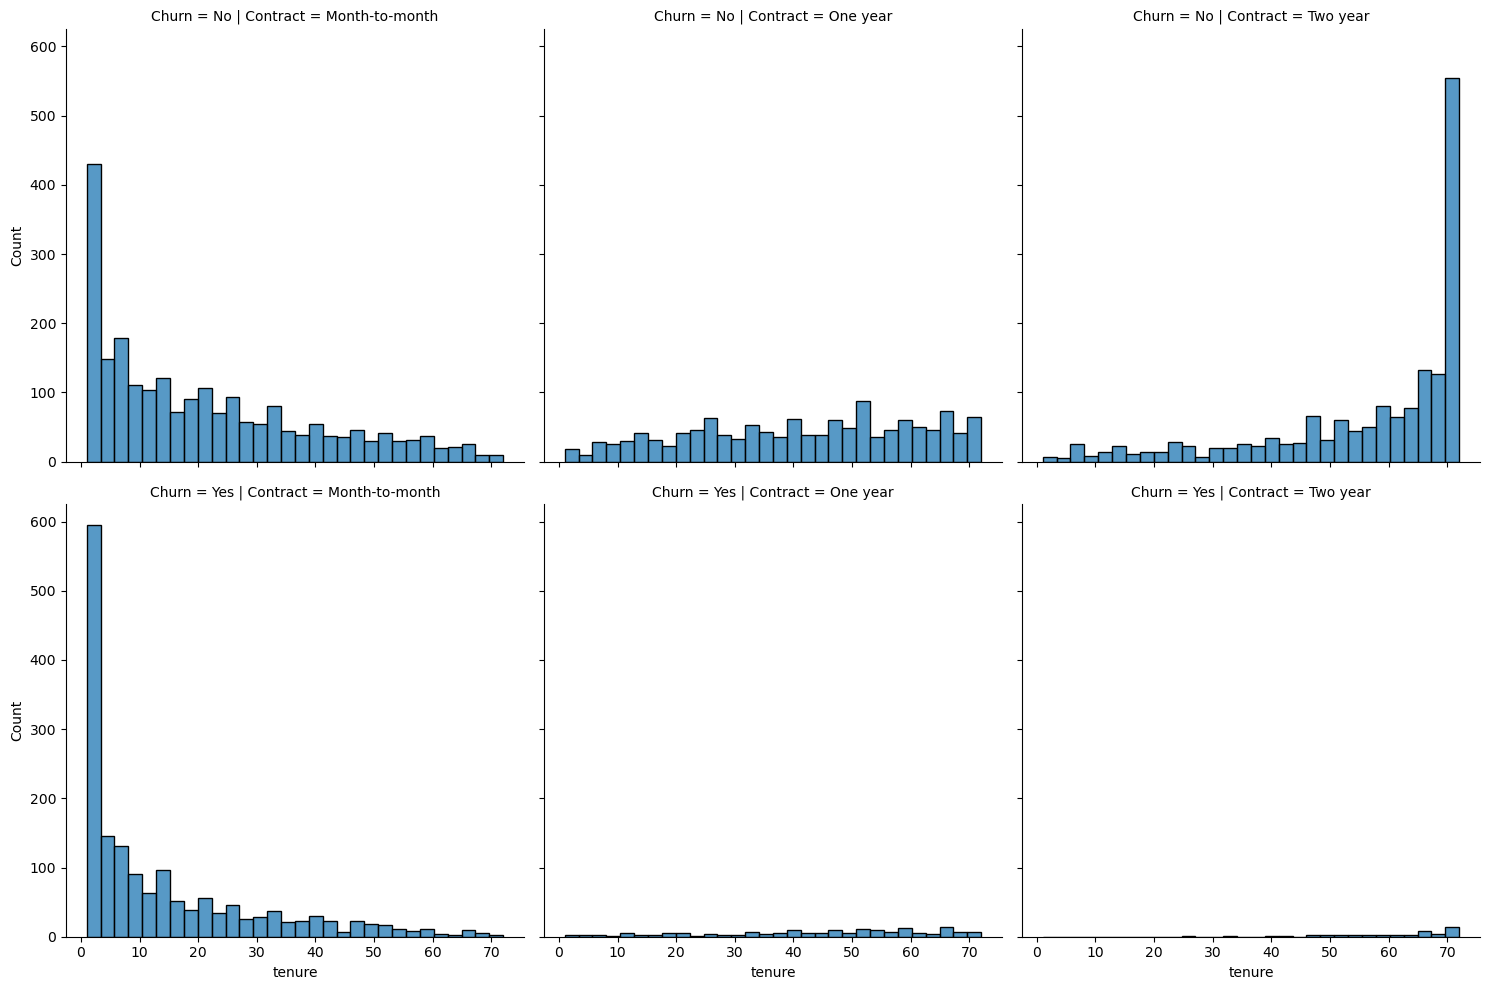

In [28]:
sns.displot(data=df, x='tenure', bins=30, col='Contract', row='Churn')

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

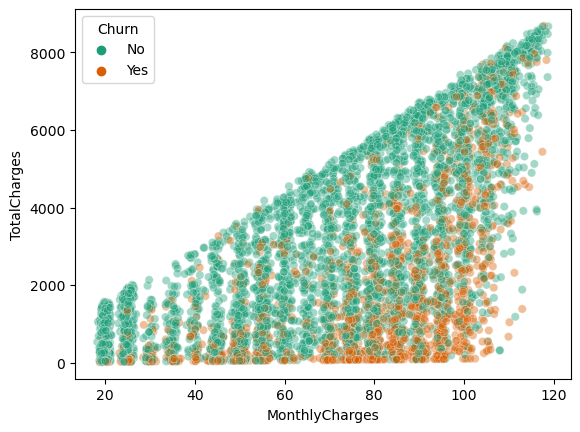

In [29]:
sns.scatterplot(data=df, x="MonthlyCharges", 
                y='TotalCharges', hue='Churn',
                alpha=0.4, palette='Dark2')

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [30]:
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [31]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [32]:
yes_churn.head()

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [33]:
no_churn.head()

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [34]:
chorn_rate = yes_churn/(no_churn+yes_churn) * 100

In [35]:
round(chorn_rate, 2)

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,61.99,51.68,47.0,47.16,48.12,36.36,38.93,34.15,38.66,38.79,...,5.56,5.0,11.84,14.61,10.2,9.0,8.42,9.24,3.53,1.66
gender,61.99,51.68,47.0,47.16,48.12,36.36,38.93,34.15,38.66,38.79,...,5.56,5.0,11.84,14.61,10.2,9.0,8.42,9.24,3.53,1.66
SeniorCitizen,61.99,51.68,47.0,47.16,48.12,36.36,38.93,34.15,38.66,38.79,...,5.56,5.0,11.84,14.61,10.2,9.0,8.42,9.24,3.53,1.66
Partner,61.99,51.68,47.0,47.16,48.12,36.36,38.93,34.15,38.66,38.79,...,5.56,5.0,11.84,14.61,10.2,9.0,8.42,9.24,3.53,1.66
Dependents,61.99,51.68,47.0,47.16,48.12,36.36,38.93,34.15,38.66,38.79,...,5.56,5.0,11.84,14.61,10.2,9.0,8.42,9.24,3.53,1.66
PhoneService,61.99,51.68,47.0,47.16,48.12,36.36,38.93,34.15,38.66,38.79,...,5.56,5.0,11.84,14.61,10.2,9.0,8.42,9.24,3.53,1.66
MultipleLines,61.99,51.68,47.0,47.16,48.12,36.36,38.93,34.15,38.66,38.79,...,5.56,5.0,11.84,14.61,10.2,9.0,8.42,9.24,3.53,1.66
InternetService,61.99,51.68,47.0,47.16,48.12,36.36,38.93,34.15,38.66,38.79,...,5.56,5.0,11.84,14.61,10.2,9.0,8.42,9.24,3.53,1.66
OnlineSecurity,61.99,51.68,47.0,47.16,48.12,36.36,38.93,34.15,38.66,38.79,...,5.56,5.0,11.84,14.61,10.2,9.0,8.42,9.24,3.53,1.66
OnlineBackup,61.99,51.68,47.0,47.16,48.12,36.36,38.93,34.15,38.66,38.79,...,5.56,5.0,11.84,14.61,10.2,9.0,8.42,9.24,3.53,1.66


**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

In [36]:
chorn_rate.transpose()["customerID"]

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<Axes: xlabel='tenure'>

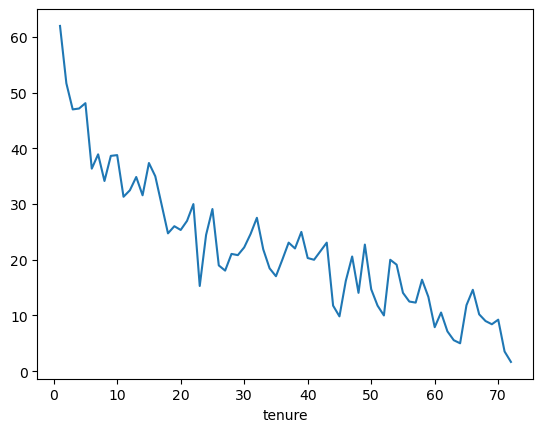

In [37]:
chorn_rate.transpose()["customerID"].plot()


### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [38]:
def cohort(tenure):
    if tenure < 13:
        return '0-12'
    elif tenure < 25:
        return '13-24'
    elif tenure < 49:
        return '25-48'
    else:
        return '>48'   

In [39]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [40]:
df[['Tenure Cohort','tenure']]


,Tenure Cohort,tenure
0,0-12,1
1,25-48,34
2,0-12,2
3,25-48,45
4,0-12,2
...,...,...
7027,13-24,24
7028,>48,72
7029,0-12,11
7030,0-12,4


**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

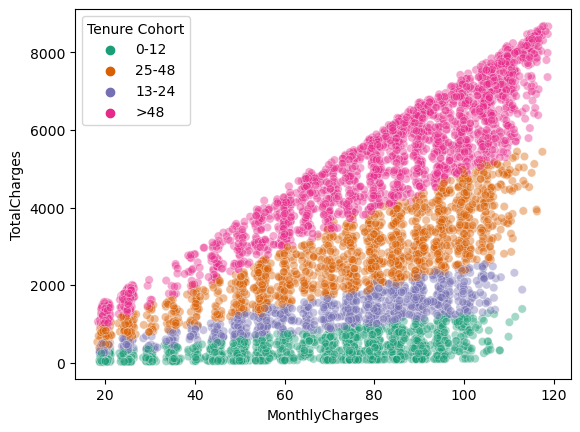

In [41]:
sns.scatterplot(data=df, x="MonthlyCharges", 
                y='TotalCharges', hue='Tenure Cohort',
                alpha=0.4, palette='Dark2')

**TASK: Create a count plot showing the churn count per cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

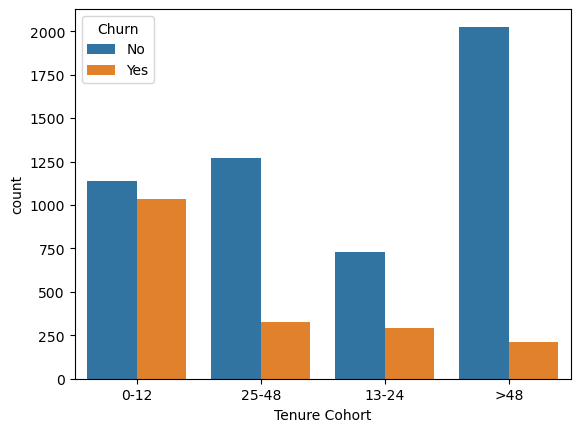

In [42]:
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

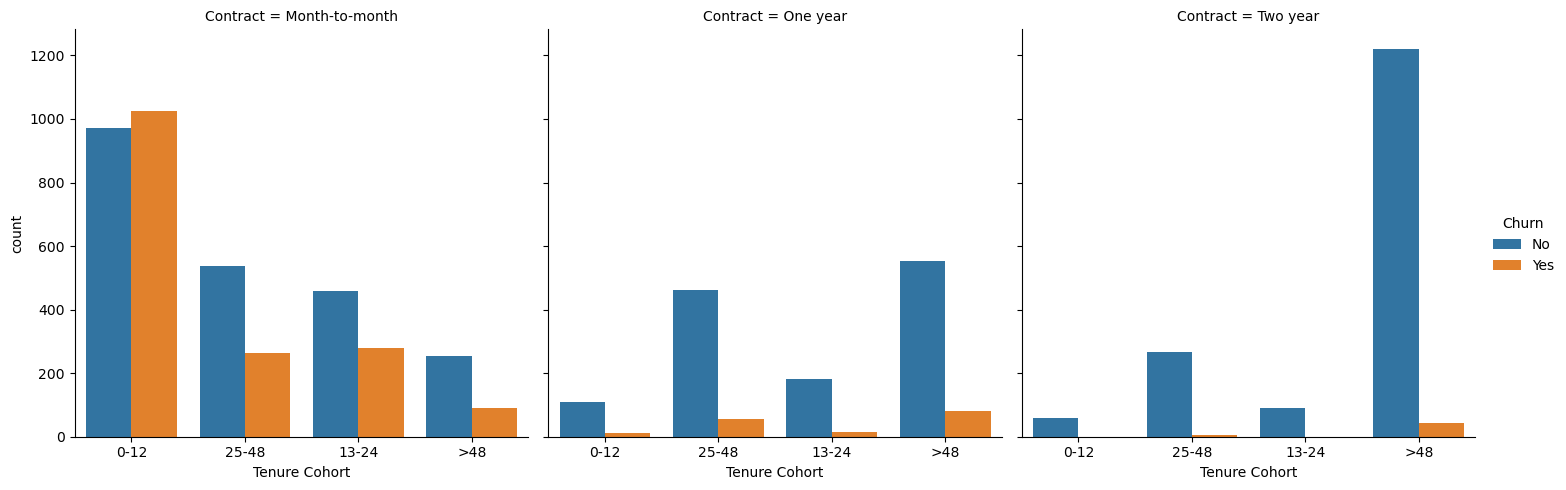

In [43]:
sns.catplot(data=df, x='Tenure Cohort', 
            kind='count', hue='Churn',
            col='Contract')

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [44]:
X = df.drop(['Churn', 'customerID'], axis=1)

In [45]:
X = pd.get_dummies(X, drop_first=True)

In [46]:
y = df['Churn']

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier(max_depth=6)

In [51]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [53]:
pred = dt.predict(X_test)

In [54]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



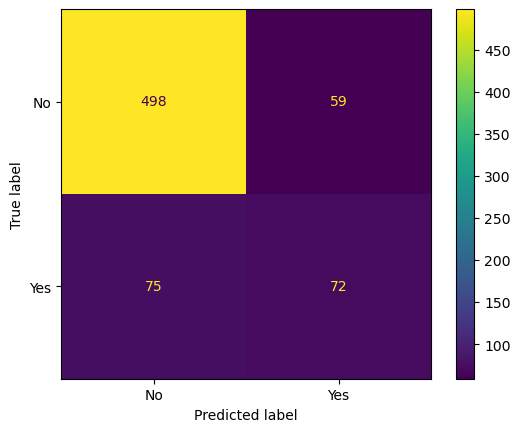

In [55]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

In [56]:
imported_feats = pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['Important'])

In [57]:
important_feats = imported_feats.sort_values('Important', ascending=False)

In [58]:
important_feats

,Important
tenure,0.423914
InternetService_Fiber optic,0.314060
TotalCharges,0.062313
MonthlyCharges,0.046115
PaymentMethod_Electronic check,0.034436
Contract_Two year,0.027065
StreamingTV_No internet service,0.026290
SeniorCitizen,0.012680
MultipleLines_Yes,0.012432
Contract_One year,0.010021


In [59]:
important_feats = important_feats[important_feats['Important'] > 0]

In [60]:
important_feats

,Important
tenure,0.423914
InternetService_Fiber optic,0.314060
TotalCharges,0.062313
MonthlyCharges,0.046115
PaymentMethod_Electronic check,0.034436
Contract_Two year,0.027065
StreamingTV_No internet service,0.026290
SeniorCitizen,0.012680
MultipleLines_Yes,0.012432
Contract_One year,0.010021


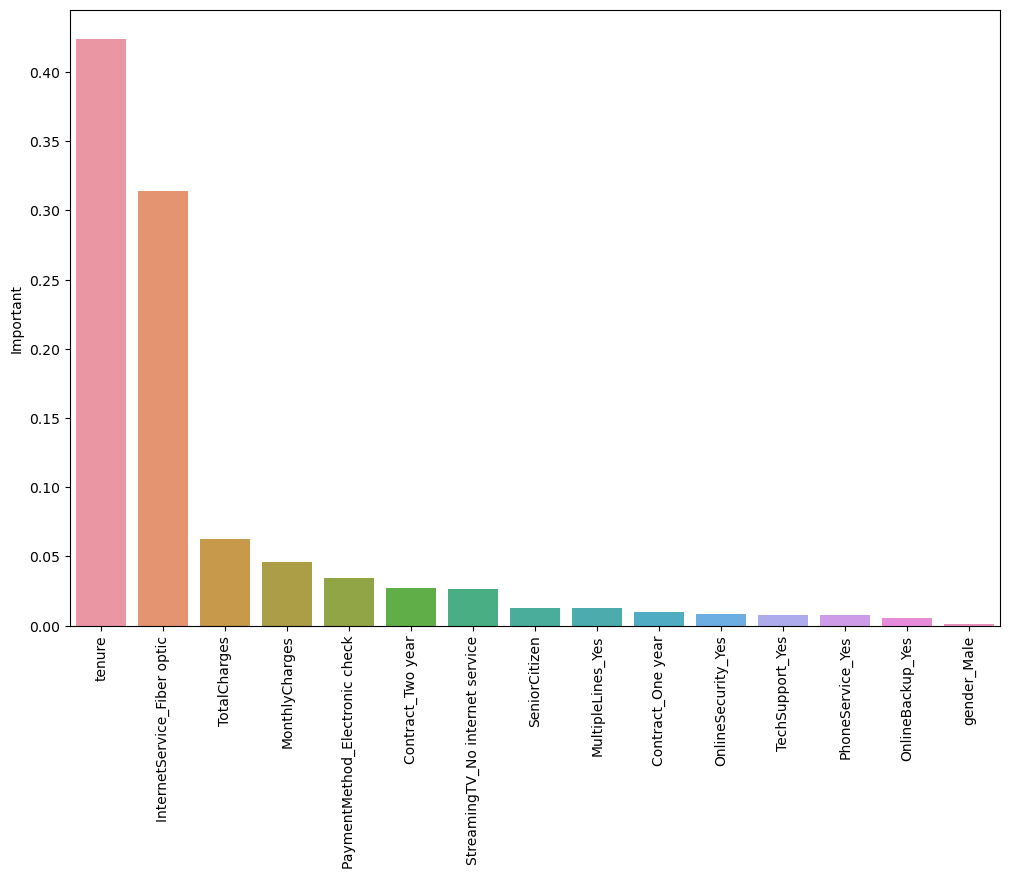

In [61]:
plt.figure(figsize=(12, 8), dpi=100)
sns.barplot(data=important_feats, x=important_feats.index, y='Important')
plt.xticks(rotation=90);

In [62]:
from sklearn.tree import plot_tree

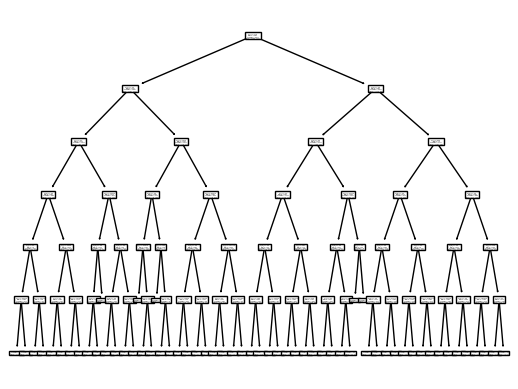

In [63]:
plot_tree(dt);

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf = RandomForestClassifier(max_depth=6)

In [66]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [67]:
pred_rf = rf.predict(X_test)

In [68]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.60      0.45      0.51       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



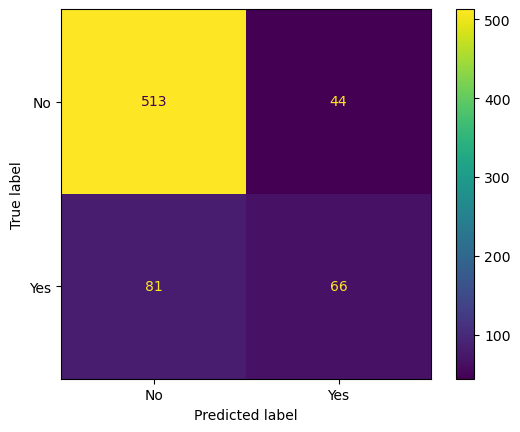

In [69]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [70]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [81]:
ada_model = AdaBoostClassifier(n_estimators=100)

In [82]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [84]:
preds = ada_model.predict(X_test)

In [85]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



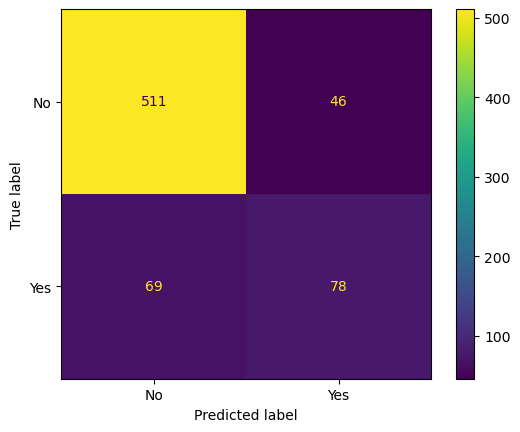

In [86]:
ConfusionMatrixDisplay.from_estimator(ada_model, X_test, y_test)

In [76]:
gb_model = GradientBoostingClassifier()

In [77]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [78]:
pred_gb = gb_model.predict(X_test)

In [79]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



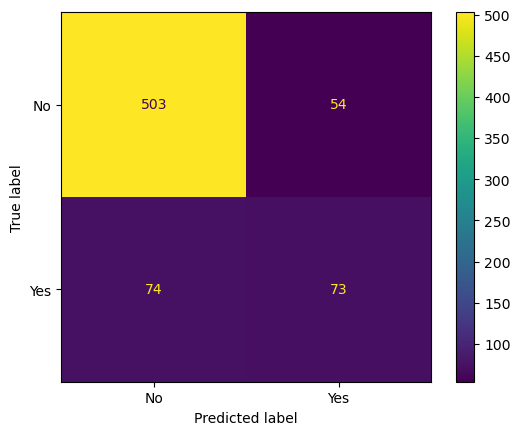

In [80]:
ConfusionMatrixDisplay.from_estimator(gb_model, X_test, y_test)


**TASK: Analyze your results, which model performed best for you?**

In [ ]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!